In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import urllib.request
import pickle
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

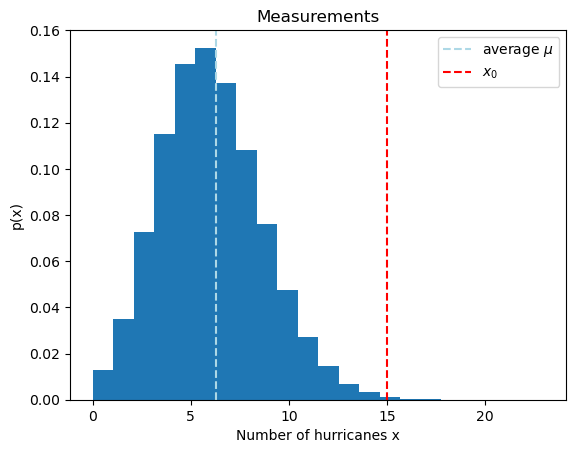

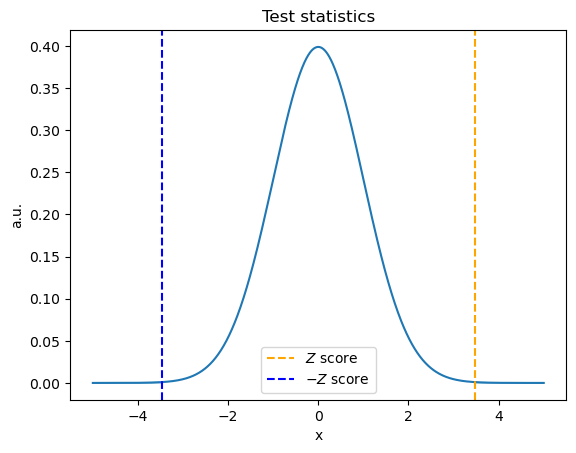

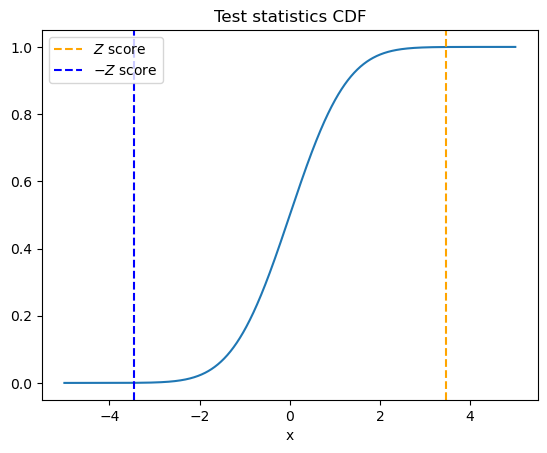

Z score = 3.5
p-value (for Z = 3.5 ) = 0.0005
p-value (for Z = 3) = 0.0027 

The probability that in a single year are observed 15 or more hurricances is 0.0005%. Since p-value(Z)<p-value(Z=3), we reject the null hypothesis: therefore, the difference between the number of hurricanes in 2005 and the historic average is statistically significant.


In [7]:
# Ex. 1.

x0 = 15
mu = 6.3
#since we assume a Poisson distribution, the variance will be the expected value
sigma_mu = np.sqrt(mu)

# plot the measurement and its assumed pdf
x = stats.poisson.rvs(mu=mu, loc=0, size=1000000)
plt.hist(x, bins=22, density=True)
plt.axvline(mu, linestyle='--', color='lightblue', label=r'average $\mu$')
plt.axvline(x0, linestyle='--', color='red', label=r'$x_0$')
plt.title("Measurements")
plt.xlabel('Number of hurricanes x')
plt.ylabel("p(x)")
plt.legend()
plt.show()

# determine the Z score
Z = abs(x0-mu)/sigma_mu

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange', label=r'$Z$ score')
plt.axvline(-Z, linestyle='--', color='blue', label=r'$-Z$ score')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.legend()
plt.show()

# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange', label=r'$Z$ score')
plt.axvline(-Z, linestyle='--', color='blue', label=r'$-Z$ score')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.legend()
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue_Z3 = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print('Z score = %.1f' %Z)
print('p-value (for Z = %.1f' %Z, ') = %.4f' %pvalue)
print('p-value (for Z = 3) = %.4f' %pvalue_Z3, '\n')

if pvalue < pvalue_Z3:
    print('The probability that in a single year are observed 15 or more hurricances is %.4f%%. Since p-value(Z)<p-value(Z=3), we reject the null hypothesis: therefore, the difference between the number of hurricanes in 2005 and the historic average is statistically significant.' %pvalue)
else:
    print('The probability that in a single year are observed 15 or more hurricances is %.4f%%. Since p-value(Z)>p-value(Z=3), we accept the null hypothesis.' %pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

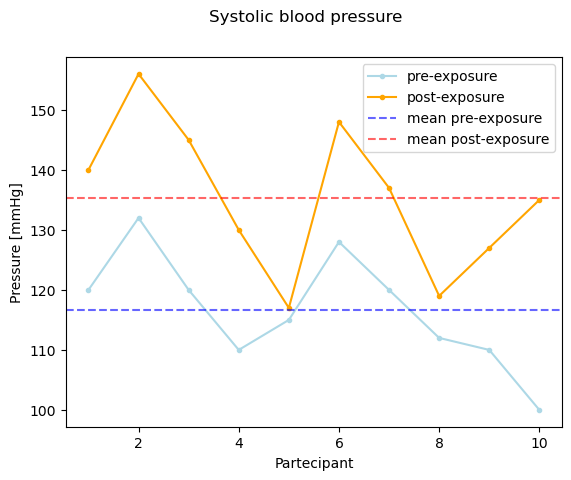

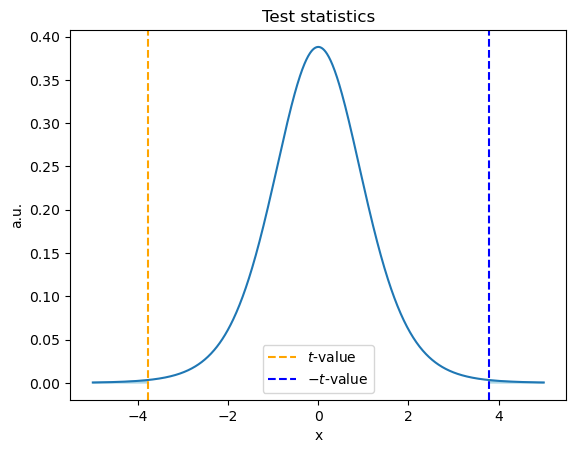

t-value = -3.8
p-value = 0.004
alpha significance level = 0.05 

Since p-value<alpha, we reject the null hypotesis: the change in blood pressures within our sample was statistically significant.


In [8]:
# Ex. 2.

#function definition
def T (mu1,mu2,sigma,n):
    return (mu1-mu2)/(sigma*np.sqrt(2/n))

def Sigma (sigma1,sigma2):
    return np.sqrt((sigma1**2+sigma2**2)/2)

# input data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre) # the size of the data sample
partecipant = np.array([i for i in range(1,n+1)])

# mean of the sample
mu1 = np.mean(pre)
mu2 = np.mean(post)
# calculate the variance and its sqrt()
sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))

# plot the measurents
fig = plt.figure()
fig.suptitle('Systolic blood pressure')
ax = fig.add_subplot()
ax.plot(partecipant, pre, marker='.', c='lightblue', label='pre-exposure')
ax.plot(partecipant, post, marker='.', c='orange', label='post-exposure')
ax.axhline(mu1, linestyle='--', color='blue', alpha=0.6, label='mean pre-exposure')
ax.axhline(mu2, linestyle='--', color='red', alpha=0.6, label='mean post-exposure')
ax.legend(loc='best')
ax.set_xlabel('Partecipant')
ax.set_ylabel('Pressure [mmHg]')
plt.show()

# calculate the test statistics
sigma = Sigma(sigma1,sigma2)
tvalue = T(mu1,mu2,sigma,n)

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n-1)
fig = plt.figure()
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs)>np.abs(tvalue), color='lightblue')
plt.axvline(tvalue, linestyle='--', color='orange', label=r'$t$-value')
plt.axvline(-tvalue, linestyle='--', color='blue', label=r'$-t$-value')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.legend()
plt.show()

# calculate the p-value
pvalue = stats.t.cdf(tvalue, n-1) + (1. - stats.t.cdf(-tvalue, n-1))
alpha = 0.05

print('t-value = %.1f' %tvalue)
print("p-value = %.3f" %pvalue)
print('alpha significance level =', alpha,'\n')

if pvalue < alpha:
    print('Since p-value<alpha, we reject the null hypotesis: the change in blood pressures within our sample was statistically significant.')
else:
    print('Since p-value>alpha, we accept the null hypotesis: the change in blood pressures within our sample was not statistically significant.')

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38,  37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12416\2499101327.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Two types of fit were performed: gaussian and cosine.

Parameters from the gaussian fit of maximum temperatures:
baseline = 16 +- 1
costant = 133 +- 14
mu = 6.74 +- 0.08
sigma = 2.3 +- 0.2 

Parameters from the gaussian fit of minimum temperatures:
baseline = -61 +- 1
costant = 261 +- 13
mu = 7.16 +- 0.05
sigma = 1.98 +- 0.08 

Parameters from the cosine fit of maximum temperatures:
temperature offset = 26.8 +- 0.4
time offset = -0.7 +- 0.1
amplitude = -10.9 +- 0.6 

Parameters from the cosine fit of minimum temperatures:
temperature offset = -40 +- 1
time offset = -1.2 +- 0.1
amplitude = -26 +- 2 



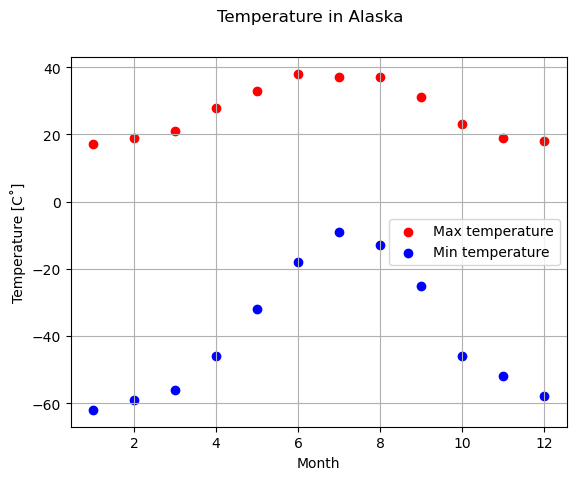

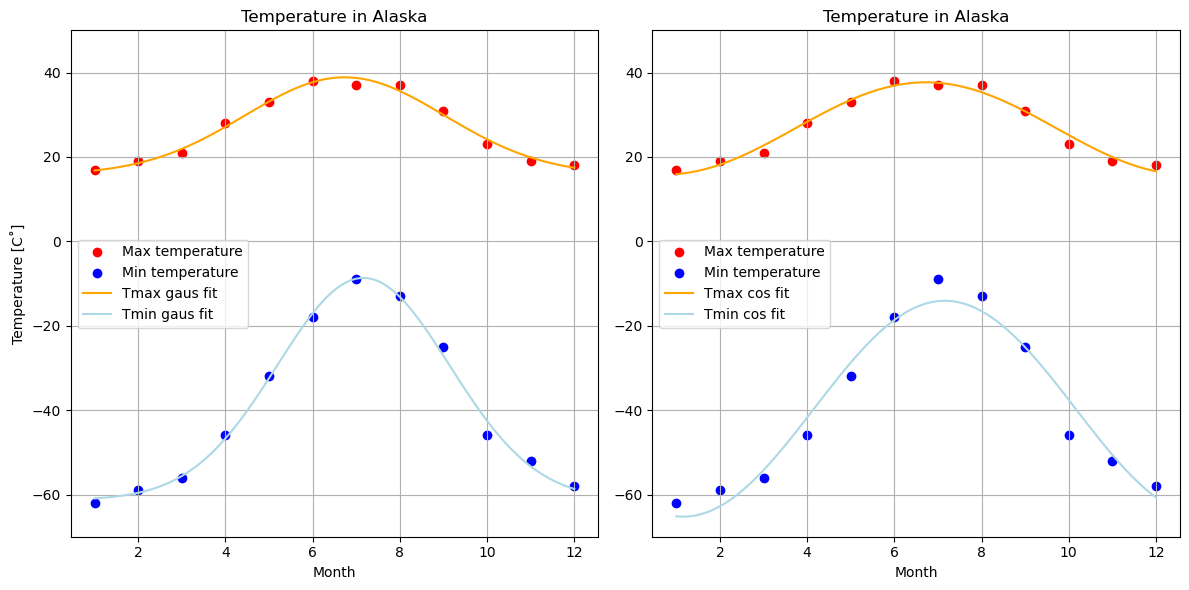

In [9]:
# Ex. 3.

#data input
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.array([i for i in range(1,13)])

#data plot
fig=plt.figure()
fig.suptitle('Temperature in Alaska')
ax=fig.add_subplot()
ax.scatter(months, temp_max, marker='o', c='r', label='Max temperature')
ax.scatter(months, temp_min, marker='o', c='b', label='Min temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature [C˚]')
ax.legend(loc='best')
ax.grid()
fig.show()

#fit function definition
def gaus(x, baseline, constant, mu, sigma):
    return baseline + constant * stats.norm.pdf(x, mu, sigma)

def cos(x, y_offset, x_offset, amplitude):
    return y_offset + amplitude * np.cos((x + x_offset) * 2*np.pi/x.max())

#gaussian fit
param_gaus_tmax, cov_gaus_tmax = optimize.curve_fit(gaus, months, temp_max)
param_gaus_tmin, cov_gaus_tmin = optimize.curve_fit(gaus, months, temp_min, [-60,6,2,60])

#cosine fit
param_cos_tmax, cov_cos_tmax = optimize.curve_fit(cos, months, temp_max, [20,0,10])
param_cos_tmin, cov_cos_tmin = optimize.curve_fit(cos, months, temp_min, [-40,0,20])

print("Two types of fit were performed: gaussian and cosine.")

#print of the gaussian fit parameters
print('\nParameters from the gaussian fit of maximum temperatures:')
print("baseline = %.0f +- %.0f" % (param_gaus_tmax[0], np.sqrt(cov_gaus_tmax[0,0])))
print("costant = %.0f +- %.0f" % (param_gaus_tmax[1], np.sqrt(cov_gaus_tmax[1,1])))
print("mu = %.2f +- %.2f" % (param_gaus_tmax[2], np.sqrt(cov_gaus_tmax[2,2])))
print("sigma = %.1f +- %.1f" % (param_gaus_tmax[3], np.sqrt(cov_gaus_tmax[3,3])),'\n')

print('Parameters from the gaussian fit of minimum temperatures:')
print("baseline = %.0f +- %.0f" % (param_gaus_tmin[0], np.sqrt(cov_gaus_tmin[0,0])))
print("costant = %.0f +- %.0f" % (param_gaus_tmin[1], np.sqrt(cov_gaus_tmin[1,1])))
print("mu = %.2f +- %.2f" % (param_gaus_tmin[2], np.sqrt(cov_gaus_tmin[2,2])))
print("sigma = %.2f +- %.2f" % (param_gaus_tmin[3], np.sqrt(cov_gaus_tmin[3,3])),'\n')

#print of the cosine fit parameters
print('Parameters from the cosine fit of maximum temperatures:')
print("temperature offset = %.1f +- %.1f" % (param_cos_tmax[0], np.sqrt(cov_cos_tmax[0,0])))
print("time offset = %.1f +- %.1f" % (param_cos_tmax[1], np.sqrt(cov_cos_tmax[1,1])))
print("amplitude = %.1f +- %.1f" % (param_cos_tmax[2], np.sqrt(cov_cos_tmax[2,2])),'\n')
                              
print('Parameters from the cosine fit of minimum temperatures:')
print("temperature offset = %.0f +- %.0f" % (param_cos_tmin[0], np.sqrt(cov_cos_tmin[0,0])))
print("time offset = %.1f +- %.1f" % (param_cos_tmin[1], np.sqrt(cov_cos_tmin[1,1])))
print("amplitude = %.0f +- %.0f" % (param_cos_tmin[2], np.sqrt(cov_cos_tmin[2,2])),'\n')

x_range = np.linspace(1,12,100)
y_range = np.linspace(-70,40,100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#gaussian fit plot
ax[0].set_title('Temperature in Alaska')
ax[0].scatter(months, temp_max, marker='o', c='r', label='Max temperature')
ax[0].scatter(months, temp_min, marker='o', c='b', label='Min temperature')
ax[0].plot(x_range, gaus(x_range,*param_gaus_tmax), c='orange', label='Tmax gaus fit')
ax[0].plot(x_range, gaus(x_range,*param_gaus_tmin), c='lightblue', label='Tmin gaus fit')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Temperature [C˚]')
ax[0].set_ylim([-70,50])
ax[0].legend(loc='best')
ax[0].grid()
#cosine fit plot
ax[1].set_title('Temperature in Alaska')
ax[1].scatter(months, temp_max, marker='o', c='r', label='Max temperature')
ax[1].scatter(months, temp_min, marker='o', c='b', label='Min temperature')
ax[1].plot(x_range, cos(x_range,*param_cos_tmax), c='orange', label='Tmax cos fit')
ax[1].plot(x_range, cos(x_range,*param_cos_tmin), c='lightblue', label='Tmin cos fit')
ax[1].set_xlabel('Month')
ax[1].set_ylim([-70,50])
ax[1].legend(loc='best')
ax[1].grid()
plt.tight_layout()
plt.show()


For the gaussian fit of maximum temperatures:
chi square = 0.37
p_value = 0.9999997291220398


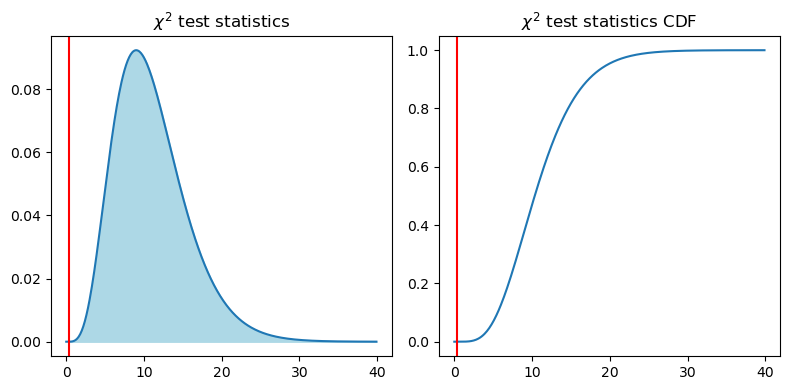


For the gaussian fit of minimum temperatures:
chi square = 0.58
p_value = 0.9999969142952139


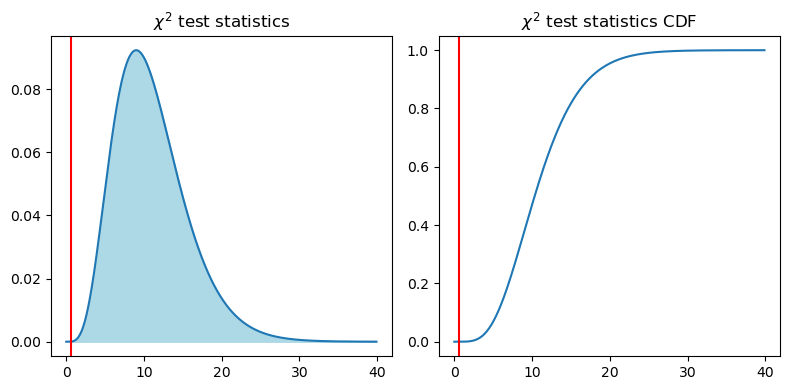


For the cosine fit of maximum temperatures:
chi square = 0.74
p_value = 0.9999895339662204


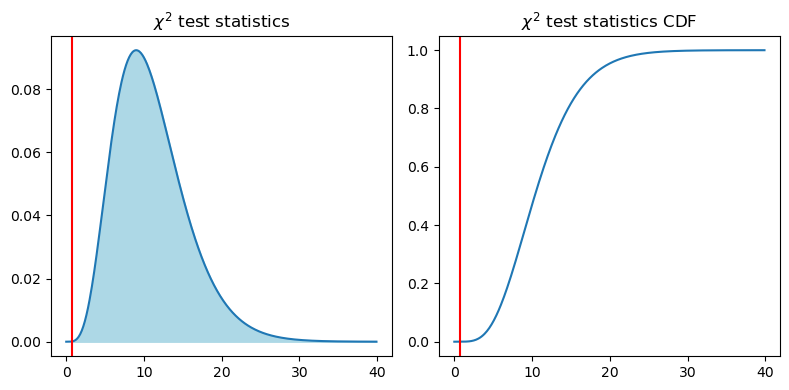


For the cosine fit of minimum temperatures:
chi square = 6.85
p_value = 0.8110179224037078


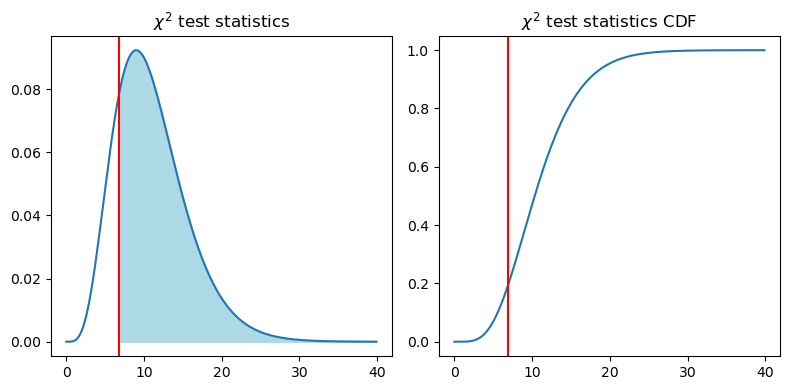


The fit is good in all cases (if the p-value is < 0.05, the fit is considered unsatisfactory), but is slightly better in the case of the gaussian fit compared to the cosine one (especially for the case of minimum temperatures).


In [10]:
#function definition: chi-square test and p-value
def chi_square_test(y, y_fit):
    sigma_y = np.sqrt(np.abs(y)) # assume random counts
    chi2 = np.sum((np.abs(y - y_fit)**2) / sigma_y**2)
    ndof = len(y) - 1 # number of degrees of freedom
    pvalue = 1. - stats.chi2.cdf(chi2, ndof)
    
    print('chi square = %.2f' %chi2)
    print('p_value = ' + str(pvalue))
    
    p = np.arange(0, 40, 0.1)
    ts = stats.chi2.pdf(p, df=ndof)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    ax[0].plot(p, ts)
    ax[0].set_title("$\chi^2$ test statistics")
    ax[0].axvline(chi2, color='red')
    ax[0].fill_between(p, ts, where=(p > chi2), color='lightblue')
    ax[1].plot(p, stats.chi2.cdf(p, df=ndof))
    ax[1].set_title("$\chi^2$ test statistics CDF")
    ax[1].axvline(chi2, color='r')
    plt.tight_layout()
    plt.show()
    
    return chi2, pvalue

#chi square test and p value for the gaussian fit
print('\nFor the gaussian fit of maximum temperatures:')
chi_square_tmax_gaus, p_value_tmax_gaus = chi_square_test(temp_max, gaus(months,*param_gaus_tmax))
print('\nFor the gaussian fit of minimum temperatures:')
chi_square_tmin_gaus, p_value_tmin_gaus = chi_square_test(temp_min, gaus(months,*param_gaus_tmin))

#chi square test and p value for the cosine fit
print('\nFor the cosine fit of maximum temperatures:')
chi_square_tmax_cos, p_value_tmax_cos = chi_square_test(temp_max, cos(months,*param_cos_tmax))
print('\nFor the cosine fit of minimum temperatures:')
chi_square_tmin_cos, p_value_tmin_cos = chi_square_test(temp_min, cos(months,*param_cos_tmin))

print("\nThe fit is good in all cases (if the p-value is < 0.05, the fit is considered unsatisfactory), but is slightly better in the case of the gaussian fit compared to the cosine one (especially for the case of minimum temperatures).")

In [11]:
#time offset compatibility from the gaussian fit
mu_tmax = param_gaus_tmax[2]
mu_tmin = param_gaus_tmin[2]
sigma_mu_tmax = np.sqrt(cov_gaus_tmax[2,2])
sigma_mu_tmin = np.sqrt(cov_gaus_tmin[2,2])
lambda_gaus = np.abs(mu_tmax-mu_tmin)/np.sqrt(sigma_mu_tmax**2+sigma_mu_tmin**2)

#time offset compatibility from the cosine fit
time_off_tmax = param_cos_tmax[1]
time_off_tmin = param_cos_tmin[1]
sigma_time_off_tmax = np.sqrt(cov_cos_tmax[1,1])
sigma_time_off_tmin = np.sqrt(cov_cos_tmin[1,1])
lambda_cos = np.abs(time_off_tmax-time_off_tmin)/np.sqrt(sigma_time_off_tmax**2+sigma_time_off_tmin**2)

print("\nClearly, the time offset for the minimum and maximum temperatures is not the same within fit accuracy:")
print('\nFrom the gaussian fit:')
print("Maximum temperatures: time offset (mu) = (%.2f +- %.2f) month" % (mu_tmax, sigma_mu_tmax))
print("Minimum temperatures: time offset (mu) = (%.2f +- %.2f) month" % (mu_tmin, sigma_mu_tmin))
print('\nFrom the cosine fit:')
print("Maximum temperatures: time offset = (%.1f +- %.1f) month" % (time_off_tmax, sigma_time_off_tmax))
print("Minimum temperatures: time offset = (%.1f +- %.1f) month" % (time_off_tmin, sigma_time_off_tmin))
print("\nCompatibility of the time offset (mu) parameter obtained from the gaussian fit: %.1f" %lambda_gaus)
print("Compatibility of the time offset parameter obtained from the cosine fit: %.1f" %lambda_cos)
print("\nGiven that lambda>=3, in the case of the gaussian fit the quantities compared (time offset) are considered incompatible.")
print("In the case of the cosine fit instead, 2<=lambda<=3 and the compatibility is bad.")


Clearly, the time offset for the minimum and maximum temperatures is not the same within fit accuracy:

From the gaussian fit:
Maximum temperatures: time offset (mu) = (6.74 +- 0.08) month
Minimum temperatures: time offset (mu) = (7.16 +- 0.05) month

From the cosine fit:
Maximum temperatures: time offset = (-0.7 +- 0.1) month
Minimum temperatures: time offset = (-1.2 +- 0.1) month

Compatibility of the time offset (mu) parameter obtained from the gaussian fit: 4.6
Compatibility of the time offset parameter obtained from the cosine fit: 2.6

Given that lambda>=3, in the case of the gaussian fit the quantities compared (time offset) are considered incompatible.
In the case of the cosine fit instead, 2<=lambda<=3 and the compatibility is bad.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [12]:
# Ex. 4.

#data import
url = "https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl?dl=1"
webURL = urllib.request.urlopen(url)
data = pickle.load(webURL)
df = pd.DataFrame(data.item())

df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


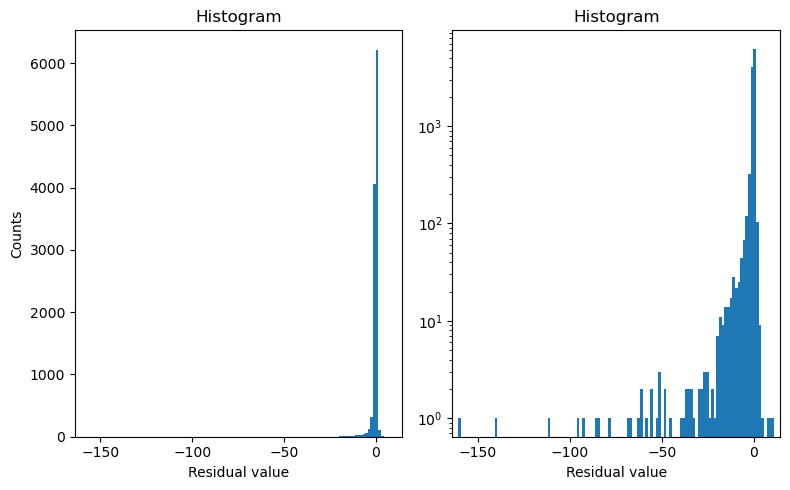


Parameters from the gaussian fit:
baseline = 5 +- 3
costant = 15218 +- 63
mu = -0.01 +- 0.01
sigma = 0.72 +- 0.01 



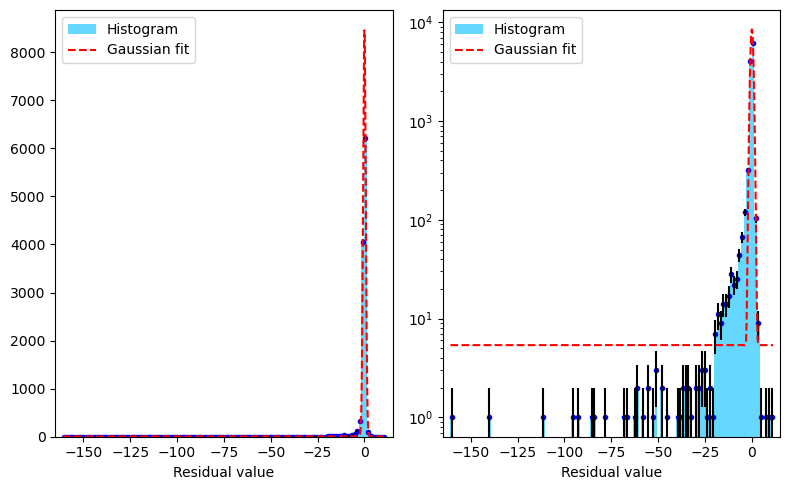

chi2: 7235.2287495063265
p-value: 0.0
The p-value is <0.05, therefore the fit is considered unsatisfactory.


In [14]:
#histogram plot of the residuals
n_bins = 120
x = df['residuals']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].hist(x, bins=n_bins)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Residual value')
ax[0].set_ylabel('Counts')
ax[0].set_xlim(df['residuals'].min()-3,df['residuals'].max()+3)
ax[1].hist(x, bins=n_bins)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Residual value')
ax[1].set_xlim(df['residuals'].min()-3,df['residuals'].max()+3)
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()

#fit function definition
def gaus(x, baseline, constant, mu, sigma):
    return baseline + constant * stats.norm.pdf(x, mu, sigma)

#gaussian fit
y,binEdges = np.histogram(x,bins=n_bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
sigma_y = np.sqrt(y) #Poisson uncertainty
popt, pcov = optimize.curve_fit(gaus, bincenters, y, p0=np.asarray([5,1,-1,1]))

#print of the gaussian fit parameters
print('\nParameters from the gaussian fit:')
print("baseline = %.0f +- %.0f" % (popt[0], np.sqrt(pcov[0,0])))
print("costant = %.0f +- %.0f" % (popt[1], np.sqrt(pcov[1,1])))
print("mu = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("sigma = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])),'\n')

#histogram plot fit
x_range = np.linspace(df['residuals'].min(),df['residuals'].max(),1000) 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].hist(x, bins=n_bins, alpha=0.6, label='Histogram', color='deepskyblue')
ax[0].scatter(bincenters,y,marker='.',color='blue')
ax[0].bar(bincenters, y, width=0, yerr=sigma_y)
ax[0].plot(x_range, gaus(x_range,*popt), c='red', linestyle='dashed' ,label='Gaussian fit',)
ax[0].set_xlabel('Residual value')
ax[0].set_xlim([-165,15])
ax[0].legend(loc='best')
ax[1].hist(x, bins=n_bins, alpha=0.6, label='Histogram', color='deepskyblue')
ax[1].scatter(bincenters,y,marker='.',color='blue')
ax[1].bar(bincenters, y, width=0, yerr=sigma_y)
ax[1].plot(x_range, gaus(x_range,*popt), c='red', linestyle='dashed' ,label='Gaussian fit',)
ax[1].set_xlabel('Residual value')
ax[1].set_xlim([-165,15])
ax[1].set_yscale('log')
ax[1].legend(loc='best')
plt.tight_layout()
plt.show()

#mask to remove zeros
y_mask = np.where(y>0)
y_filtered = y[y_mask]
sigma_y_filtered = sigma_y[y_mask]
bincenters_filtered = bincenters[y_mask]

#chi square test
ndof = n_bins - 1
chi2 = np.sum(((y_filtered - gaus(bincenters_filtered,*popt))**2) / sigma_y_filtered)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print('chi2:', chi2)
print("p-value:", pvalue)
print("The p-value is <0.05, therefore the fit is considered unsatisfactory.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [15]:
# Ex. 5.

# Load the data
url = "https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt?dl=1"
webURL = urllib.request.urlopen(url)
df1 = pd.read_csv(webURL, names=['Time','Temperature'], delimiter=" ")
# Data range 2008 to 2012
df2 = df1.loc[df1['Time'].between(2008, 2012, inclusive='both')].copy()
df2

,Time,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333



Parameters from the fit function f(t):
a = -10.0 +- 0.2
b = 12.33 +- 0.02
c = 9.4 +- 0.1 

Average temperature from the fit function parameters: c = 9.38411486809072 C˚
Minimum temperature from the fit function parameters: c-a = 19.372248557225234 C˚
Maximum temperature from the fit function parameters: c+a = -0.6040188210437964 C˚

Minimum temperature from the minimization of the fit function: -0.6040188210437964 C˚
Maximum temperature from the maximization of the fit function: 19.37224855722517 C˚


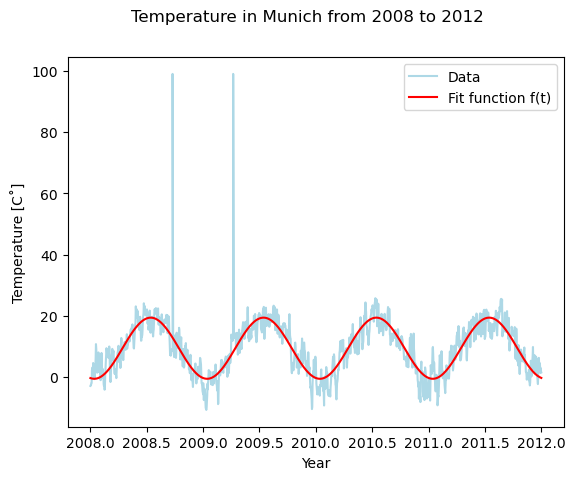

In [16]:
# Define the fit function f(t)
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Use curve_fit to find the best-fit parameters
popt_f, pcov_f = optimize.curve_fit(f, df2['Time'],df2['Temperature'])

# Print of the best-fit parameters
print('\nParameters from the fit function f(t):')
print("a = %.1f +- %.1f" % (popt_f[0], np.sqrt(pcov_f[0,0])))
print("b = %.2f +- %.2f" % (popt_f[1], np.sqrt(pcov_f[1,1])))
print("c = %.1f +- %.1f" % (popt_f[2], np.sqrt(pcov_f[2,2])),'\n')

# Plot the data and the best-fit model
t_range = np.linspace(df2['Time'].min(),df2['Time'].max(),1500) 
fig = plt.figure()
fig.suptitle('Temperature in Munich from 2008 to 2012')
plt.plot(df2['Time'], df2['Temperature'], c='lightblue', label='Data')
plt.plot(t_range, f(t_range,*popt_f), c='red', label='Fit function f(t)',)
plt.xlabel('Year')
plt.ylabel('Temperature [C˚]')
plt.legend(loc='best')

print('Average temperature from the fit function parameters: c =', popt_f[2],'C˚')
print('Minimum temperature from the fit function parameters: c-a =', popt_f[2]-popt_f[0],'C˚')
print('Maximum temperature from the fit function parameters: c+a =', popt_f[2]+popt_f[0],'C˚')

temp_min = optimize.minimize_scalar(lambda t: f(t, popt_f[0], popt_f[1], popt_f[2]))
temp_max = optimize.minimize_scalar(lambda t: -f(t, popt_f[0], popt_f[1], popt_f[2]))

print('\nMinimum temperature from the minimization of the fit function:', temp_min['fun'],'C˚')
print('Maximum temperature from the maximization of the fit function:', -1*temp_max['fun'],'C˚')

The parameter $b$ is the phase shift of the cosine function. It determines the t value for the maximum and minimum of the function, then in the context of the exercise determines the time of year when the temperature is minimum or maximum.

$$f(t)=f_{max} \quad \text{when} \quad t = k - \frac{b}{2\pi} \quad \forall k \in \mathbf{N}$$

$$f(t)=f_{min} \quad \text{when} \quad t = \frac{1}{2} + k - \frac{b}{2\pi} \quad \forall k \in \mathbf{N}$$


Parameters from the fit function f(t):
a = -10.0 +- 0.2
b = 1.001 +- 0.003
c = -6 +- 32
d = 9.4 +- 0.1 



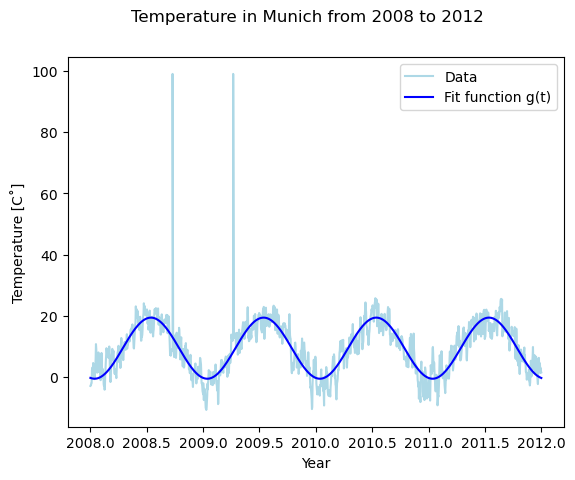

In [17]:
# Define the fit function g(t)
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

# Use curve_fit to find the best-fit parameters
popt_g, pcov_g = optimize.curve_fit(g, df2['Time'],df2['Temperature'])

# Print of the best-fit parameters
print('\nParameters from the fit function f(t):')
print("a = %.1f +- %.1f" % (popt_g[0], np.sqrt(pcov_g[0,0])))
print("b = %.3f +- %.3f" % (popt_g[1], np.sqrt(pcov_g[1,1])))
print("c = %.0f +- %.0f" % (popt_g[2], np.sqrt(pcov_g[2,2])))
print("d = %.1f +- %.1f" % (popt_g[3], np.sqrt(pcov_g[3,3])),'\n')

# Plot the data and the best-fit model
t_range = np.linspace(df2['Time'].min(),df2['Time'].max(),1500) 
fig = plt.figure()
fig.suptitle('Temperature in Munich from 2008 to 2012')
plt.plot(df2['Time'], df2['Temperature'], c='lightblue', label='Data')
plt.plot(t_range, g(t_range,*popt_g), c='blue', label='Fit function g(t)',)
plt.xlabel('Year')
plt.ylabel('Temperature [C˚]')
plt.legend(loc='best')

In [19]:
# define alpha
alpha = 0.05

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

# RRS calculation
ssr_f = np.sum((df2['Temperature'] - f(df2['Time'],*popt_f))**2)
ssr_g = np.sum((df2['Temperature'] - g(df2['Time'],*popt_g))**2)
print('Residual Sum of Squares (RSS) or Sum of Squared Residuals (SSR) of the fit f(t) =', ssr_f)
print('Residual Sum of Squares (RSS) or Sum of Squared Residuals (SSR) of the fit g(t) =', ssr_g,'\n')

# run F-test: f(t) vs g(t)
ndof_f = 2
ndof_g = 3
N = len(df2['Temperature'])
print('F-test f(t) vs g(t):')
cl_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)

Residual Sum of Squares (RSS) or Sum of Squared Residuals (SSR) of the fit f(t) = 34359.85859996652
Residual Sum of Squares (RSS) or Sum of Squared Residuals (SSR) of the fit g(t) = 34352.79405393762 

F-test f(t) vs g(t):
p-value: 0.584 , additional parameter necessary: NO
